# Network Analysis Lab

Complete the following exercises to help solidify your understanding of network analysis.

In [1]:
import networkx as nx
import pandas as pd

## U.S. Mens Basketball Data Set

In the `us_mens_basketball.csv` data set, each row represents an single basketball player's participation in a single event at a single Olympics. 

In [2]:
basketball = pd.read_csv('us_mens_basketball.csv')

In [3]:
basketball.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,2636,"Stephen Todd ""Steve"" Alford",M,19.0,185.0,74.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Gold
2,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,3874,"William Lloyd ""Willie"" Anderson, Jr.",M,21.0,200.0,86.0,United States,USA,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Bronze
4,4505,Carmelo Kyan Anthony,M,20.0,203.0,109.0,United States,USA,2004 Summer,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze


## 1. Transform this data set into one that can be turned into a graph where the entities are represented by the Name field and the relationships are represented by whether the players played in the same Olympics together (Games field).

Sort descending by the number of pairwise interactions. Which pair of players have competed in the most Olympics together?

In [4]:
result = pd.merge(basketball, basketball, on='Games')

In [5]:
pd.set_option('max_colwidth', 800)

In [6]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
result

,ID_x,Name_x,Sex_x,Age_x,Height_x,Weight_x,Team_x,NOC_x,Games,Year_x,Season_x,City_x,Sport_x,Event_x,Medal_x,ID_y,Name_y,Sex_y,Age_y,Height_y,Weight_y,Team_y,NOC_y,Year_y,Season_y,City_y,Sport_y,Event_y,Medal_y
0,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
1,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,2863,Walter Ray Allen,M,25.0,192.0,93.0,United States,USA,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
2,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,7040,"Vincent Lamont ""Vin"" Baker",M,28.0,207.0,109.0,United States,USA,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
3,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,18662,"Vincent Lamar ""Vince"" Carter",M,23.0,195.0,102.0,United States,USA,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
4,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,38826,Kevin Maurice Garnett,M,24.0,207.0,100.0,United States,USA,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
5,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,45964,"Timothy Duane ""Tim"" Hardaway",M,34.0,180.0,88.0,United States,USA,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
6,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,50268,Allan Wade Houston,M,29.0,195.0,91.0,United States,USA,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
7,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,59569,Jason Frederick Kidd,M,27.0,193.0,96.0,United States,USA,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
8,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,77496,Antonio Keithflen McDyess,M,26.0,202.0,109.0,United States,USA,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold
9,351,Julius Shareef Abdur-Rahim,M,23.0,202.0,104.0,United States,USA,2000 Summer,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold,82625,Alonzo Harding Mourning,M,30.0,206.0,117.0,United States,USA,2000,Summer,Sydney,Basketball,Basketball Men's Basketball,Gold


In [7]:
g = result.groupby(["Name_x", "Name_y"])
print(g.groups)

{('Adrian Delano Dantley', 'Adrian Delano Dantley'): Int64Index([1047], dtype='int64'), ('Adrian Delano Dantley', 'Ernest "Ernie" Grunfeld'): Int64Index([1050], dtype='int64'), ('Adrian Delano Dantley', 'Kenneth Alan "Kenny" Carr'): Int64Index([1046], dtype='int64'), ('Adrian Delano Dantley', 'Michel Taylor "Tate" Armstrong'): Int64Index([1044], dtype='int64'), ('Adrian Delano Dantley', 'Mitchell William "Mitch" Kupchak'): Int64Index([1052], dtype='int64'), ('Adrian Delano Dantley', 'Philip Jackson "Phil" Ford, Jr.'): Int64Index([1049], dtype='int64'), ('Adrian Delano Dantley', 'Phillip Gregory "Phil" Hubbard'): Int64Index([1051], dtype='int64'), ('Adrian Delano Dantley', 'Scott Glenn May'): Int64Index([1054], dtype='int64'), ('Adrian Delano Dantley', 'Steven Bernard "Steve" Sheppard'): Int64Index([1055], dtype='int64'), ('Adrian Delano Dantley', 'Thomas Joseph "Tom" LaGarde'): Int64Index([1053], dtype='int64'), ('Adrian Delano Dantley', 'Walter Paul Davis'): Int64Index([1048], dtype='

In [8]:
for p in g.groups: 
    print(p, " has ", len(g.groups[p]), " entries")

('Adrian Delano Dantley', 'Adrian Delano Dantley')  has  1  entries
('Adrian Delano Dantley', 'Ernest "Ernie" Grunfeld')  has  1  entries
('Adrian Delano Dantley', 'Kenneth Alan "Kenny" Carr')  has  1  entries
('Adrian Delano Dantley', 'Michel Taylor "Tate" Armstrong')  has  1  entries
('Adrian Delano Dantley', 'Mitchell William "Mitch" Kupchak')  has  1  entries
('Adrian Delano Dantley', 'Philip Jackson "Phil" Ford, Jr.')  has  1  entries
('Adrian Delano Dantley', 'Phillip Gregory "Phil" Hubbard')  has  1  entries
('Adrian Delano Dantley', 'Scott Glenn May')  has  1  entries
('Adrian Delano Dantley', 'Steven Bernard "Steve" Sheppard')  has  1  entries
('Adrian Delano Dantley', 'Thomas Joseph "Tom" LaGarde')  has  1  entries
('Adrian Delano Dantley', 'Walter Paul Davis')  has  1  entries
('Adrian Delano Dantley', 'William Quinn Buckner')  has  1  entries
('Adrian Howard Smith', 'Adrian Howard Smith')  has  1  entries
('Adrian Howard Smith', 'Burdette Eliele "Burdie" Haldorson')  has  1

('Burdette Eliele "Burdie" Haldorson', 'Walter Jones "Walt" Bellamy, Jr.')  has  1  entries
('Burdette Eliele "Burdie" Haldorson', 'William Best "Billy" Evans')  has  1  entries
('Burdette Eliele "Burdie" Haldorson', 'William Fenton "Bill" Russell')  has  1  entries
('Burdette Eliele "Burdie" Haldorson', 'William Marion "Bill" Hougland')  has  1  entries
('Calvin Bernard "Cal" Fowler', 'Calvin Bernard "Cal" Fowler')  has  1  entries
('Calvin Bernard "Cal" Fowler', 'Charles Thomas "Charlie" Scott')  has  1  entries
('Calvin Bernard "Cal" Fowler', 'Donald Francis "Don" Dee')  has  1  entries
('Calvin Bernard "Cal" Fowler', 'Glynn Saulters')  has  1  entries
('Calvin Bernard "Cal" Fowler', 'James H. "Jim" King')  has  1  entries
('Calvin Bernard "Cal" Fowler', 'John Kenneth "Ken" Spain')  has  1  entries
('Calvin Bernard "Cal" Fowler', 'John Richard Clawson')  has  1  entries
('Calvin Bernard "Cal" Fowler', 'Joseph Henry "Jo-Jo" White')  has  1  entries
('Calvin Bernard "Cal" Fowler', 'Mi

('Charles Thomas "Charlie" Scott', 'Joseph Henry "Jo-Jo" White')  has  1  entries
('Charles Thomas "Charlie" Scott', 'Michael Barnwell "Mike" Silliman')  has  1  entries
('Charles Thomas "Charlie" Scott', 'Michael Thomas "Mike" Barrett')  has  1  entries
('Charles Thomas "Charlie" Scott', 'Spencer Haywood')  has  1  entries
('Charles Thomas "Charlie" Scott', 'Wilmer Frederick "Bill" Hosket')  has  1  entries
('Charles Thomas "Tom" McMillen', 'Charles Thomas "Tom" McMillen')  has  1  entries
('Charles Thomas "Tom" McMillen', 'Dwight Elmo Jones')  has  1  entries
('Charles Thomas "Tom" McMillen', 'James Ricardo "Jim" Forbes')  has  1  entries
('Charles Thomas "Tom" McMillen', 'James Turner "Jim" Brewer')  has  1  entries
('Charles Thomas "Tom" McMillen', 'Kenneth Bryan "Kenny" Davis')  has  1  entries
('Charles Thomas "Tom" McMillen', 'Kevin Francis Joyce')  has  1  entries
('Charles Thomas "Tom" McMillen', 'Michael Allen "Mike" Bantom')  has  1  entries
('Charles Thomas "Tom" McMillen',

('Clyde Austin Drexler', 'Larry Joe Bird')  has  1  entries
('Clyde Austin Drexler', 'Michael Jeffrey Jordan')  has  1  entries
('Clyde Austin Drexler', 'Patrick Aloysius Ewing')  has  1  entries
('Clyde Austin Drexler', 'Scottie Maurice Pippen')  has  1  entries
('Clyde Edward Lovellette', 'Charles Monroe "Charlie" Hoag')  has  1  entries
('Clyde Edward Lovellette', 'Clyde Edward Lovellette')  has  1  entries
('Clyde Edward Lovellette', 'Dan Luther Pippin')  has  1  entries
('Clyde Edward Lovellette', 'Frank Reilly McCabe')  has  1  entries
('Clyde Edward Lovellette', 'Howard Earl "Howie" Williams')  has  1  entries
('Clyde Edward Lovellette', 'John Frederick Keller')  has  1  entries
('Clyde Edward Lovellette', 'Marcus Ross "Marc" Freiberger')  has  1  entries
('Clyde Edward Lovellette', 'Melvin Dean Kelley')  has  1  entries
('Clyde Edward Lovellette', 'Robert Albert "Bob" Kurland')  has  1  entries
('Clyde Edward Lovellette', 'Robert Earl "Bob" Kenney')  has  1  entries
('Clyde Edw

('Duane Alexander Swanson', 'Frank John Lubin')  has  1  entries
('Duane Alexander Swanson', 'Jack Williamson Ragland')  has  1  entries
('Duane Alexander Swanson', 'John Haskell "Tex" Gibbons')  has  1  entries
('Duane Alexander Swanson', 'Joseph Cephis "Joe" Fortenberry')  has  1  entries
('Duane Alexander Swanson', 'Ralph English Bishop')  has  1  entries
('Duane Alexander Swanson', 'Samuel J. "Sam" Balter, Jr.')  has  1  entries
('Duane Alexander Swanson', 'Willard Theodore Schmidt')  has  1  entries
('Duane Alexander Swanson', 'William John "Bill" Wheatley')  has  1  entries
('Dwight David Howard', 'Carlos Austin Boozer, Jr.')  has  1  entries
('Dwight David Howard', 'Carmelo Kyan Anthony')  has  1  entries
('Dwight David Howard', 'Christopher Emmanuel "Chris" Paul')  has  1  entries
('Dwight David Howard', 'Christopher Wesson "Chris" Bosh')  has  1  entries
('Dwight David Howard', 'Deron Michael Williams')  has  1  entries
('Dwight David Howard', 'Dwight David Howard')  has  1  e

('Gary Dwayne Payton', 'Julius Shareef Abdur-Rahim')  has  1  entries
('Gary Dwayne Payton', 'Karl Malone')  has  1  entries
('Gary Dwayne Payton', 'Kevin Maurice Garnett')  has  1  entries
('Gary Dwayne Payton', 'Mitchell James "Mitch" Richmond, III')  has  1  entries
('Gary Dwayne Payton', 'Reginald Wayne "Reggie" Miller')  has  1  entries
('Gary Dwayne Payton', 'Scottie Maurice Pippen')  has  1  entries
('Gary Dwayne Payton', "Shaquille Rashuan O'Neal")  has  1  entries
('Gary Dwayne Payton', 'Steven Delano "Steve" Smith')  has  1  entries
('Gary Dwayne Payton', 'Timothy Duane "Tim" Hardaway')  has  1  entries
('Gary Dwayne Payton', 'Vincent Lamar "Vince" Carter')  has  1  entries
('Gary Dwayne Payton', 'Vincent Lamont "Vin" Baker')  has  1  entries
('Gary Dwayne Payton', 'Walter Ray Allen')  has  1  entries
('George "Jiff" Wilson', 'George "Jiff" Wilson')  has  1  entries
('George "Jiff" Wilson', 'Jeffrey Vincent "Jeff" Mullins')  has  1  entries
('George "Jiff" Wilson', 'Jerry Fra

('Hyland DeAndre Jordan, Jr.', 'Kevin Wayne Durant')  has  1  entries
('Hyland DeAndre Jordan, Jr.', 'Klay Alexander Thompson')  has  1  entries
('Hyland DeAndre Jordan, Jr.', 'Kyle Lowry')  has  1  entries
('Hyland DeAndre Jordan, Jr.', 'Kyrie Andrew Irving')  has  1  entries
('Hyland DeAndre Jordan, Jr.', 'Paul George')  has  1  entries
('Jack Williamson Ragland', 'Arthur Owen "Art" Mollner')  has  1  entries
('Jack Williamson Ragland', 'Carl Leslie Shy')  has  1  entries
('Jack Williamson Ragland', 'Carl Stanley Knowles')  has  1  entries
('Jack Williamson Ragland', 'Donald Arthur "Don" Piper')  has  1  entries
('Jack Williamson Ragland', 'Duane Alexander Swanson')  has  1  entries
('Jack Williamson Ragland', 'Francis Lee Johnson')  has  1  entries
('Jack Williamson Ragland', 'Frank John Lubin')  has  1  entries
('Jack Williamson Ragland', 'Jack Williamson Ragland')  has  1  entries
('Jack Williamson Ragland', 'John Haskell "Tex" Gibbons')  has  1  entries
('Jack Williamson Ragland'

('Jerry Franklin Shipp', 'George "Jiff" Wilson')  has  1  entries
('Jerry Franklin Shipp', 'Jeffrey Vincent "Jeff" Mullins')  has  1  entries
('Jerry Franklin Shipp', 'Jerry Franklin Shipp')  has  1  entries
('Jerry Franklin Shipp', 'John Paul "Pete" McCaffrey')  has  1  entries
('Jerry Franklin Shipp', 'Joseph Louis "Joe" Caldwell')  has  1  entries
('Jerry Franklin Shipp', 'Lawrence Harvey "Larry" Brown')  has  1  entries
('Jerry Franklin Shipp', 'Lucious Brown "Luke" Jackson, Jr.')  has  1  entries
('Jerry Franklin Shipp', 'Melvin Grant "Mel" Counts')  has  1  entries
('Jerry Franklin Shipp', 'Richard Allen "Dick" Davies')  has  1  entries
('Jerry Franklin Shipp', 'Velvet James "Jim" Barnes')  has  1  entries
('Jerry Franklin Shipp', 'Walter Raphael "Walt" Hazzard')  has  1  entries
('Jerry Franklin Shipp', 'William Warren "Bill" Bradley')  has  1  entries
('Jerry Ray Lucas', 'Adrian Howard Smith')  has  1  entries
('Jerry Ray Lucas', 'Burdette Eliele "Burdie" Haldorson')  has  1  e

('Kevin Wayne Durant', 'Russell Westbrook, Jr.')  has  1  entries
('Kevin Wayne Durant', 'Tyson Cleotis Chandler')  has  1  entries
('Kevin Wesley Love', 'Andre Tyler Iguodala')  has  1  entries
('Kevin Wesley Love', 'Anthony Marshon Davis, Jr.')  has  1  entries
('Kevin Wesley Love', 'Carmelo Kyan Anthony')  has  1  entries
('Kevin Wesley Love', 'Christopher Emmanuel "Chris" Paul')  has  1  entries
('Kevin Wesley Love', 'Deron Michael Williams')  has  1  entries
('Kevin Wesley Love', 'James Edward Harden, Jr.')  has  1  entries
('Kevin Wesley Love', 'Kevin Wayne Durant')  has  1  entries
('Kevin Wesley Love', 'Kevin Wesley Love')  has  1  entries
('Kevin Wesley Love', 'Kobe Bean Bryant')  has  1  entries
('Kevin Wesley Love', 'LeBron Raymone James')  has  1  entries
('Kevin Wesley Love', 'Russell Westbrook, Jr.')  has  1  entries
('Kevin Wesley Love', 'Tyson Cleotis Chandler')  has  1  entries
('Klay Alexander Thompson', 'Carmelo Kyan Anthony')  has  1  entries
('Klay Alexander Thomps

('Lucious Brown "Luke" Jackson, Jr.', 'John Paul "Pete" McCaffrey')  has  1  entries
('Lucious Brown "Luke" Jackson, Jr.', 'Joseph Louis "Joe" Caldwell')  has  1  entries
('Lucious Brown "Luke" Jackson, Jr.', 'Lawrence Harvey "Larry" Brown')  has  1  entries
('Lucious Brown "Luke" Jackson, Jr.', 'Lucious Brown "Luke" Jackson, Jr.')  has  1  entries
('Lucious Brown "Luke" Jackson, Jr.', 'Melvin Grant "Mel" Counts')  has  1  entries
('Lucious Brown "Luke" Jackson, Jr.', 'Richard Allen "Dick" Davies')  has  1  entries
('Lucious Brown "Luke" Jackson, Jr.', 'Velvet James "Jim" Barnes')  has  1  entries
('Lucious Brown "Luke" Jackson, Jr.', 'Walter Raphael "Walt" Hazzard')  has  1  entries
('Lucious Brown "Luke" Jackson, Jr.', 'William Warren "Bill" Bradley')  has  1  entries
('Marcus Ross "Marc" Freiberger', 'Charles Monroe "Charlie" Hoag')  has  1  entries
('Marcus Ross "Marc" Freiberger', 'Clyde Edward Lovellette')  has  1  entries
('Marcus Ross "Marc" Freiberger', 'Dan Luther Pippin')  h

('Paul Douglas "Doug" Collins', 'Charles Thomas "Tom" McMillen')  has  1  entries
('Paul Douglas "Doug" Collins', 'Dwight Elmo Jones')  has  1  entries
('Paul Douglas "Doug" Collins', 'James Ricardo "Jim" Forbes')  has  1  entries
('Paul Douglas "Doug" Collins', 'James Turner "Jim" Brewer')  has  1  entries
('Paul Douglas "Doug" Collins', 'Kenneth Bryan "Kenny" Davis')  has  1  entries
('Paul Douglas "Doug" Collins', 'Kevin Francis Joyce')  has  1  entries
('Paul Douglas "Doug" Collins', 'Michael Allen "Mike" Bantom')  has  1  entries
('Paul Douglas "Doug" Collins', 'Paul Douglas "Doug" Collins')  has  1  entries
('Paul Douglas "Doug" Collins', 'Robert Clyde "Bobby" Jones')  has  1  entries
('Paul Douglas "Doug" Collins', 'Thomas Edward "Tom" Henderson')  has  1  entries
('Paul Douglas "Doug" Collins', 'Tommy Loren Burleson')  has  1  entries
('Paul Douglas "Doug" Collins', 'William Edward "Ed" Ratleff')  has  1  entries
('Paul George', 'Carmelo Kyan Anthony')  has  1  entries
('Paul G

('Robert Earl "Bob" Kenney', 'Dan Luther Pippin')  has  1  entries
('Robert Earl "Bob" Kenney', 'Frank Reilly McCabe')  has  1  entries
('Robert Earl "Bob" Kenney', 'Howard Earl "Howie" Williams')  has  1  entries
('Robert Earl "Bob" Kenney', 'John Frederick Keller')  has  1  entries
('Robert Earl "Bob" Kenney', 'Marcus Ross "Marc" Freiberger')  has  1  entries
('Robert Earl "Bob" Kenney', 'Melvin Dean Kelley')  has  1  entries
('Robert Earl "Bob" Kenney', 'Robert Albert "Bob" Kurland')  has  1  entries
('Robert Earl "Bob" Kenney', 'Robert Earl "Bob" Kenney')  has  1  entries
('Robert Earl "Bob" Kenney', 'Ronald Yngve "Ron" Bontemps')  has  1  entries
('Robert Earl "Bob" Kenney', 'Victor Wayne Glasgow')  has  1  entries
('Robert Earl "Bob" Kenney', 'William Barner "Bill" Lienhard')  has  1  entries
('Robert Earl "Bob" Kenney', 'William Marion "Bill" Hougland')  has  1  entries
('Robert Eugene "Bob" Jeangerard', 'Burdette Eliele "Burdie" Haldorson')  has  1  entries
('Robert Eugene "Bob

('Spencer Haywood', 'Glynn Saulters')  has  1  entries
('Spencer Haywood', 'James H. "Jim" King')  has  1  entries
('Spencer Haywood', 'John Kenneth "Ken" Spain')  has  1  entries
('Spencer Haywood', 'John Richard Clawson')  has  1  entries
('Spencer Haywood', 'Joseph Henry "Jo-Jo" White')  has  1  entries
('Spencer Haywood', 'Michael Barnwell "Mike" Silliman')  has  1  entries
('Spencer Haywood', 'Michael Thomas "Mike" Barrett')  has  1  entries
('Spencer Haywood', 'Spencer Haywood')  has  1  entries
('Spencer Haywood', 'Wilmer Frederick "Bill" Hosket')  has  1  entries
('Stacey Orlando Augmon', 'Charles Daniel H. Smith')  has  1  entries
('Stacey Orlando Augmon', 'Charles Edward Smith, IV')  has  1  entries
('Stacey Orlando Augmon', 'Daniel Lewis "Dan" Majerle')  has  1  entries
('Stacey Orlando Augmon', 'Daniel Ricardo "Danny" Manning')  has  1  entries
('Stacey Orlando Augmon', 'David Maurice Robinson')  has  1  entries
('Stacey Orlando Augmon', 'Herman "J. R." Reid, Jr.')  has  1 

('Tommy Loren Burleson', 'James Ricardo "Jim" Forbes')  has  1  entries
('Tommy Loren Burleson', 'James Turner "Jim" Brewer')  has  1  entries
('Tommy Loren Burleson', 'Kenneth Bryan "Kenny" Davis')  has  1  entries
('Tommy Loren Burleson', 'Kevin Francis Joyce')  has  1  entries
('Tommy Loren Burleson', 'Michael Allen "Mike" Bantom')  has  1  entries
('Tommy Loren Burleson', 'Paul Douglas "Doug" Collins')  has  1  entries
('Tommy Loren Burleson', 'Robert Clyde "Bobby" Jones')  has  1  entries
('Tommy Loren Burleson', 'Thomas Edward "Tom" Henderson')  has  1  entries
('Tommy Loren Burleson', 'Tommy Loren Burleson')  has  1  entries
('Tommy Loren Burleson', 'William Edward "Ed" Ratleff')  has  1  entries
('Tyson Cleotis Chandler', 'Andre Tyler Iguodala')  has  1  entries
('Tyson Cleotis Chandler', 'Anthony Marshon Davis, Jr.')  has  1  entries
('Tyson Cleotis Chandler', 'Carmelo Kyan Anthony')  has  1  entries
('Tyson Cleotis Chandler', 'Christopher Emmanuel "Chris" Paul')  has  1  entr

('William Edward "Ed" Ratleff', 'Paul Douglas "Doug" Collins')  has  1  entries
('William Edward "Ed" Ratleff', 'Robert Clyde "Bobby" Jones')  has  1  entries
('William Edward "Ed" Ratleff', 'Thomas Edward "Tom" Henderson')  has  1  entries
('William Edward "Ed" Ratleff', 'Tommy Loren Burleson')  has  1  entries
('William Edward "Ed" Ratleff', 'William Edward "Ed" Ratleff')  has  1  entries
('William Fenton "Bill" Russell', 'Burdette Eliele "Burdie" Haldorson')  has  1  entries
('William Fenton "Bill" Russell', 'Carl Cecil Cain')  has  1  entries
('William Fenton "Bill" Russell', 'Charles Frick "Chuck" Darling')  has  1  entries
('William Fenton "Bill" Russell', 'Gilbert "Gib" Ford')  has  1  entries
('William Fenton "Bill" Russell', 'James Patrick "Jim" Walsh')  has  1  entries
('William Fenton "Bill" Russell', 'K. C. Jones')  has  1  entries
('William Fenton "Bill" Russell', 'Richard James "Dick" Boushka')  has  1  entries
('William Fenton "Bill" Russell', 'Robert Eugene "Bob" Jeange

In [9]:
group = result.groupby(['Name_x','Name_y']).size().groupby(level=0).agg({'count(Name_x-Name_y':'size'})

C:\Users\gissellec\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


In [10]:
results = result.groupby(['Name_x','Name_y']).size().reset_index().rename(columns={0:'count'})

In [11]:
results.sort_values('count',ascending=False)
#Lebron James and Carmelo Anthony have been teammates most

,Name_x,Name_y,count
260,Carmelo Kyan Anthony,Carmelo Kyan Anthony,4
1557,LeBron Raymone James,Carmelo Kyan Anthony,3
1570,LeBron Raymone James,LeBron Raymone James,3
560,David Maurice Robinson,David Maurice Robinson,3
282,Carmelo Kyan Anthony,LeBron Raymone James,3
1356,Karl Malone,John Houston Stockton,2
1439,Kevin Wayne Durant,Kevin Wayne Durant,2
1206,John Houston Stockton,Charles Wade Barkley,2
1799,Patrick Aloysius Ewing,"Christopher Paul ""Chris"" Mullin",2
248,"Carlos Austin Boozer, Jr.",LeBron Raymone James,2


In [12]:
results = results.drop(results[results.Name_x == results.Name_y].index)


In [13]:
results.sort_values('count', ascending=False)

,Name_x,Name_y,count
1557,LeBron Raymone James,Carmelo Kyan Anthony,3
282,Carmelo Kyan Anthony,LeBron Raymone James,3
1347,Karl Malone,Charles Wade Barkley,2
1487,Kobe Bean Bryant,LeBron Raymone James,2
429,"Christopher Paul ""Chris"" Mullin",Michael Jeffrey Jordan,2
617,Deron Michael Williams,Kobe Bean Bryant,2
618,Deron Michael Williams,LeBron Raymone James,2
1206,John Houston Stockton,Charles Wade Barkley,2
244,"Carlos Austin Boozer, Jr.","Dwyane Tyrone Wade, Jr.",2
1744,"Mitchell James ""Mitch"" Richmond, III",David Maurice Robinson,2


## 2. Use the `from_pandas_edgelist` method to turn the data frame into a graph.

In [14]:
results.shape

(2464, 3)

In [15]:
G = nx.from_pandas_edgelist(results,'Name_x', 'Name_y','count')


In [16]:
type(G)

networkx.classes.graph.Graph

## 3. Compute and print the following graph statistics for the graph:

- Number of nodes
- Number of edges
- Average degree
- Density

In [17]:
len(G.node)


196

In [18]:
len(G.edges)

1232

In [19]:
sum(dict(G.degree()).values())/G.order()

12.571428571428571

In [20]:
nx.density(G)

0.06446886446886448

## 4. Compute betweenness centrality for the graph and print the top 5 nodes with the highest centrality.

In [21]:
betweenness = nx.betweenness_centrality(G, weight='edge')

In [22]:
betweenness = pd.DataFrame.from_dict(betweenness, orient='index', columns=['B'])

In [23]:
betweenness.sort_values('B',ascending=False)[0:5]

,B
Gary Dwayne Payton,0.091938
Jason Frederick Kidd,0.091356
Carmelo Kyan Anthony,0.047423
David Maurice Robinson,0.032662
"William Marion ""Bill"" Hougland",0.030241


## 5. Compute Eigenvector centrality for the graph and print the top 5 nodes with the highest centrality.

In [24]:
eigenvector = nx.eigenvector_centrality_numpy(G)


In [25]:
eigenvector = pd.DataFrame.from_dict(eigenvector, orient='index', columns=['B'])

In [26]:
eigenvector.sort_values('B',ascending=False)[0:5]

,B
Carmelo Kyan Anthony,0.341850
LeBron Raymone James,0.288454
Kobe Bean Bryant,0.224317
"Christopher Emmanuel ""Chris"" Paul",0.224317
Deron Michael Williams,0.224317


## 6. Compute degree centrality for the graph and print the top 5 nodes with the highest centrality.

In [27]:
degree = nx.degree_centrality(G)

In [28]:
degree = pd.DataFrame.from_dict(degree, orient='index', columns=['B'])

In [29]:
degree.sort_values('B',ascending=False)[0:5]

,B
Carmelo Kyan Anthony,0.184615
David Maurice Robinson,0.143590
"Robert Albert ""Bob"" Kurland",0.133333
LeBron Raymone James,0.133333
"William Marion ""Bill"" Hougland",0.123077


## 7. Generate a network visualization for the entire graph using a Kamada-Kawai force-directed layout.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\gissellec\AppData\Local\Programs\Python\Python37\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


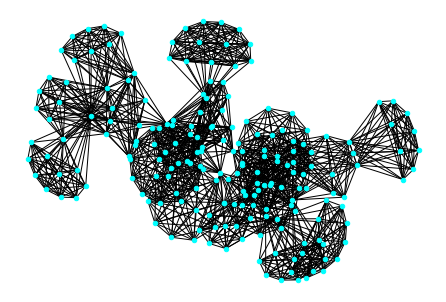

In [31]:
nx.draw_kamada_kawai(G, node_size=20, node_color='cyan')

## 8. Create and visualize an ego graph for the player with the highest betweenness centrality.

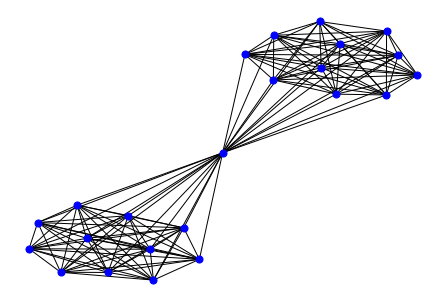

In [32]:
ego=nx.ego_graph(G, 'Gary Dwayne Payton', radius=1)
pos=nx.spring_layout(ego)
nx.draw(ego,pos,node_color='b',node_size=50,with_labels=False)
plt.savefig('ego_graph.png')
plt.show()

## 9. Identify the communities within the entire graph and produce another visualization of it with the nodes color-coded by the community they belong to.

In [33]:
import community

In [34]:
parts = community.best_partition(G)

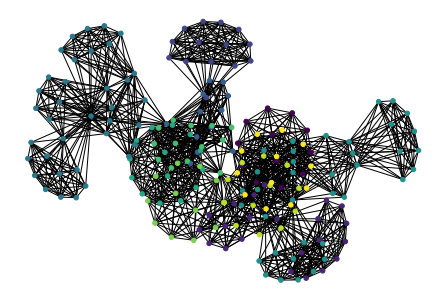

In [36]:
values = list(parts.values())
nx.draw_kamada_kawai(G, node_size=20, node_color=values)

## Bonus: Hierarchical Graphs

Thus far, we have analyzed graphs where the nodes represented individual players and the edges represented Olympic games that they have competed in together. We can analyze the data at a higher level if we wanted to, strippping out the players as entities and analyzing the data at the Games level. To do this, we would need to reconstruct the graph so that the *Games* field represents the entities and then use the player names as the edge criteria so that there would be an edge between two Olympic games if an player played in both of them. You already have the tools in your toolbox to be able to do this, so give it a try. 

### Create a graph with Games as the entities and then print out the graph statistics.

### Generate a network visualization of this graph using the layout of your choice.